# Data Preparation

In [1]:
import os

In [2]:
train_dir = 'dataset/dataset/train'
test_dir = 'dataset/dataset/test'

In [3]:
# Train Dataset

#fresh
fresh_apples_train_dir = os.path.join(train_dir, 'freshapples')
fresh_banana_train_dir = os.path.join(train_dir, 'freshbanana')
fresh_oranges_train_dir = os.path.join(train_dir, 'freshoranges')

#rotten
rotten_apples_train_dir = os.path.join(train_dir, 'rottenapples')
rotten_banana_train_dir = os.path.join(train_dir, 'rottenbanana')
rotten_oranges_train_dir = os.path.join(train_dir, 'rottenoranges')


In [4]:
# Test Dataset

#fresh
fresh_apples_test_dir = os.path.join(test_dir, 'freshapples')
fresh_banana_test_dir = os.path.join(test_dir, 'freshbanana')
fresh_oranges_test_dir = os.path.join(test_dir, 'freshoranges')

#rotten
rotten_apples_test_dir = os.path.join(test_dir, 'rottenapples')
rotten_banana_test_dir = os.path.join(test_dir, 'rottenbanana')
rotten_oranges_test_dir = os.path.join(test_dir, 'rottenoranges')

In [5]:
print("No. of train fresh apple image : ", len(os.listdir(fresh_apples_train_dir)))
print("No. of train fresh banana image : ", len(os.listdir(fresh_banana_train_dir)))
print("No. of train fresh orange image : ", len(os.listdir(fresh_oranges_train_dir)))
print("No. of train rotten apple image : ", len(os.listdir(rotten_apples_train_dir)))
print("No. of train rotten banana image : ", len(os.listdir(rotten_banana_train_dir)))
print("No. of train rotten orange image : ", len(os.listdir(rotten_oranges_train_dir)))

No. of train fresh apple image :  1693
No. of train fresh banana image :  1581
No. of train fresh orange image :  1466
No. of train rotten apple image :  2342
No. of train rotten banana image :  2224
No. of train rotten orange image :  1595


In [6]:
print("No.of test fresh apple image : ", len(os.listdir(fresh_apples_test_dir)))
print("No.of test fresh banana image : ", len(os.listdir(fresh_banana_test_dir)))
print("No.of test fresh orange image : ", len(os.listdir(fresh_oranges_test_dir)))
print("No.of test rotten apple image : ", len(os.listdir(rotten_apples_test_dir)))
print("No.of test rotten banana image : ", len(os.listdir(rotten_banana_test_dir)))
print("No.of test rotten orange image : ", len(os.listdir(rotten_oranges_test_dir)))

No.of test fresh apple image :  395
No.of test fresh banana image :  381
No.of test fresh orange image :  388
No.of test rotten apple image :  601
No.of test rotten banana image :  530
No.of test rotten orange image :  403


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
(302, 308)


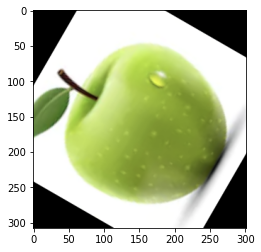

In [7]:
import random
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

filename = os.listdir(fresh_apples_train_dir)
sample = random.choice(filename)
image = load_img(os.path.join(fresh_apples_train_dir,sample))
print(image.size)
plt.imshow(image)

# Data Preprocessing

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(
                    rescale=1.0/255,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest'
                )

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150,150),
                    batch_size=20,
                    class_mode='categorical'
                )

validation_generator = val_datagen.flow_from_directory(
                    test_dir,
                    target_size=(150,150),
                    batch_size=20,
                    class_mode='categorical'
                )

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


# Conv2D sequential model

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import callbacks

In [11]:
model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(6, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 17, 64)        0

In [13]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

c:\users\harshit\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# Training Data

In [14]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_steps=50,
                    verbose=2                    
)

Epoch 1/100
100/100 - 44s - loss: 1.6771 - acc: 0.4075 - val_loss: 0.7906 - val_acc: 0.6860
Epoch 2/100
100/100 - 42s - loss: 1.0351 - acc: 0.5967 - val_loss: 1.0660 - val_acc: 0.6500
Epoch 3/100
100/100 - 42s - loss: 0.7929 - acc: 0.7020 - val_loss: 0.7951 - val_acc: 0.7090
Epoch 4/100
100/100 - 42s - loss: 0.6752 - acc: 0.7565 - val_loss: 0.4921 - val_acc: 0.7960
Epoch 5/100
100/100 - 42s - loss: 0.6093 - acc: 0.7805 - val_loss: 0.4652 - val_acc: 0.8430
Epoch 6/100
100/100 - 41s - loss: 0.5522 - acc: 0.7990 - val_loss: 0.4127 - val_acc: 0.8540
Epoch 7/100
100/100 - 41s - loss: 0.5345 - acc: 0.8070 - val_loss: 0.4719 - val_acc: 0.7940
Epoch 8/100
100/100 - 41s - loss: 0.4952 - acc: 0.8265 - val_loss: 0.3805 - val_acc: 0.8460
Epoch 9/100
100/100 - 41s - loss: 0.4626 - acc: 0.8380 - val_loss: 0.3103 - val_acc: 0.8890
Epoch 10/100
100/100 - 41s - loss: 0.4571 - acc: 0.8360 - val_loss: 0.2867 - val_acc: 0.8980
Epoch 11/100
100/100 - 40s - loss: 0.3978 - acc: 0.8565 - val_loss: 0.3410 - va

Epoch 90/100
100/100 - 41s - loss: 0.2439 - acc: 0.9275 - val_loss: 0.2606 - val_acc: 0.9160
Epoch 91/100
100/100 - 40s - loss: 0.1933 - acc: 0.9330 - val_loss: 0.1266 - val_acc: 0.9580
Epoch 92/100
100/100 - 41s - loss: 0.2282 - acc: 0.9320 - val_loss: 0.3049 - val_acc: 0.9220
Epoch 93/100
100/100 - 40s - loss: 0.2498 - acc: 0.9355 - val_loss: 0.1448 - val_acc: 0.9520
Epoch 94/100
100/100 - 41s - loss: 0.2960 - acc: 0.9315 - val_loss: 0.1302 - val_acc: 0.9530
Epoch 95/100
100/100 - 41s - loss: 0.2333 - acc: 0.9320 - val_loss: 0.1224 - val_acc: 0.9660
Epoch 96/100
100/100 - 40s - loss: 0.2556 - acc: 0.9283 - val_loss: 0.2015 - val_acc: 0.9260
Epoch 97/100
100/100 - 40s - loss: 0.2315 - acc: 0.9305 - val_loss: 0.1570 - val_acc: 0.9420
Epoch 98/100
100/100 - 40s - loss: 0.2291 - acc: 0.9248 - val_loss: 0.0655 - val_acc: 0.9760
Epoch 99/100
100/100 - 40s - loss: 0.2358 - acc: 0.9285 - val_loss: 0.1030 - val_acc: 0.9580
Epoch 100/100
100/100 - 40s - loss: 0.2568 - acc: 0.9270 - val_loss: 0

Text(0.5, 1.0, 'Training and validation loss')

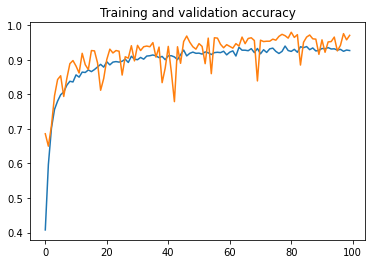

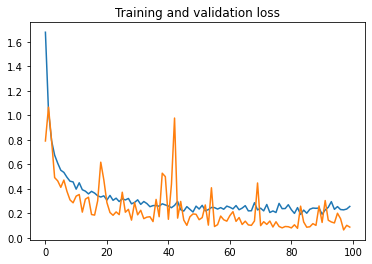

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [16]:
model.evaluate(validation_generator)

135/135 [==============================] - 13s 98ms/step - loss: 0.0960 - acc: 0.9696


[0.09602624922990799, 0.9696071147918701]

In [17]:
result = model.evaluate_generator(validation_generator, 50)
print(result)
print('Accuracy: ', result[1])

c:\users\harshit\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.10030792653560638, 0.968999981880188]
Accuracy:  0.968999981880188


# Prediction

dataset/dataset/test\freshoranges\vertical_flip_Screen Shot 2018-06-13 at 12.16.22 AM.png
[[0. 0. 1. 0. 0. 0.]]
fresh orange


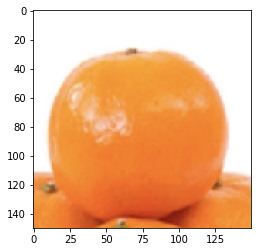

In [29]:
names = [fresh_apples_test_dir,
         fresh_banana_test_dir,
         fresh_oranges_test_dir,
         rotten_apples_test_dir,
         rotten_banana_test_dir,
         rotten_oranges_test_dir
]
name_rand = random.choice(names)


filename = os.listdir(name_rand)
sample = random.choice(filename)
fn = os.path.join(name_rand,sample)
print(fn)


img = load_img(fn, target_size=(150, 150))
plt.imshow(img)


x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)


prediction = ''

if classes[0][0]==1:
    prediction = 'fresh apple'
elif classes[0][1]==1:
    prediction = 'fresh banana'
elif classes[0][2]==1:
    prediction = 'fresh orange'
elif classes[0][3]==1:
    prediction = 'rotten apple'
elif classes[0][4]==1:
    prediction = 'rotten banana'
elif classes[0][5]==1:
    prediction = 'rotten orange'

print(prediction)